<a href="https://colab.research.google.com/github/gabriel-afd/Analise_Historica_Indicadores_Brasil/blob/main/An%C3%A1lise_Hist%C3%B3rica_Indicadores_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Libs para Modelagem e Matrizes
import numpy as np
import requests
import pandas as pd

# Libs para análises gráficas
import matplotlib.pyplot as plt
import seaborn as sns

# Libs para utilizar o Plotly
import plotly.express as px
import plotly.graph_objects as Dash

# Lib para ignorar avisos
import warnings

# Desabilitando avisos
warnings.filterwarnings('ignore')

In [2]:
#Função para fazer requisições à API Worldbank
def get_world_api_infodata(country, indicatorCode):
  url = f"https://api.worldbank.org/v2/country/{country}/indicator/{indicatorCode}?format=json"
  response = requests.get(url)
  data = response.json()

  #Extraindo dados de valor e data
  if len(data) > 1 and isinstance(data[1], list):
        return [(item['date'], item['value']) for item in data[1] if item['value'] is not None]
  else:
    return []


#Indicadores para o Brasil(código - BRA)

#Criando dicionário 'indicators'
indicators = {
    "PIB per Capita": "NY.GDP.PCAP.CD",
    "Crescimento Econômico" : "NY.GDP.MKTP.KD.ZG",
    "População" : "SP.POP.TOTL",
    "Pobreza" : "SI.POV.DDAY",
    "Alfabetização" : "SE.ADT.LITR.ZS",
    "Expectativa de Vida" : "SP.DYN.LE00.IN",
    "Número de Gini" : "SI.POV.GINI",
    "Taxa de Desemprego" : "SL.UEM.TOTL.ZS",
    "População Masculina": "SP.POP.TOTL.MA.IN",
    "População Feminina" : "SP.POP.TOTL.FE.IN",
    "Taxa de Alfabetização Masculina": "SE.ADT.LITR.MA.ZS",
    "Taxa de Alfabetização Feminina": "SE.ADT.LITR.FE.ZS",
    "Baixa Renda": "SI.POV.DDAY",
    "Renda Média Baixa": "NY.GDP.PCAP.CD",
    "Renda Média Alta": "NY.GDP.PCAP.MK.DT",
    "Alta Renda": "NY.GDP.PCAP.PP.CD",
    "IDH": "SP.DYN.LE00.IN",
    "Taxa de Inflação Anual":"FP.CPI.TOTL.ZG"
}


#Buscando dados para cada indicador e armazenando em um DataFrame
dataInfo = {}

for indicatorName, indicatorCode in indicators.items():
  dataInfo[indicatorName] = get_world_api_infodata("BRA", indicatorCode)


# Obter todos os anos disponiveis até 2022
allYears = set()
for indicatorData in dataInfo.values():
  allYears.update([str(entry[0]) for entry in indicatorData])

#Filtrar até 2022
allYears = sorted([year for year in allYears if int(year) <= 2022], reverse=False) #Do mais antigo ao mais recente

#Criar DataFrame preenchido com NaN
finalData = {indicator: [None] * len(allYears) for indicator in indicators}

# Preencher o DataFrame com os valores obtidos
for indicatorName, indicatorData in dataInfo.items():
    for year, value in indicatorData:
        year = str(year)  # Garantir que o ano seja uma string
        if year in allYears:
            index = allYears.index(year)  # Obter o índice do ano
            finalData[indicatorName][index] = value

Para código dos indicadores, consultar: [Indicadores](https://data.worldbank.org/indicator)

In [3]:
#Criando o DataFrame
baseData = pd.DataFrame(finalData, index = allYears)

baseData.head()


,PIB per Capita,Crescimento Econômico,População,Pobreza,Alfabetização,Expectativa de Vida,Número de Gini,Taxa de Desemprego,População Masculina,População Feminina,Taxa de Alfabetização Masculina,Taxa de Alfabetização Feminina,Baixa Renda,Renda Média Baixa,Renda Média Alta,Alta Renda,IDH,Taxa de Inflação Anual
1974,1044.769809,8.153939,105089675,NaN,NaN,58.881,NaN,NaN,52448501,52641174,NaN,NaN,NaN,1044.769809,None,NaN,58.881,NaN
1975,1200.558237,5.166649,107619565,NaN,NaN,59.353,NaN,NaN,53701639,53917926,NaN,NaN,NaN,1200.558237,None,NaN,59.353,NaN
1976,1389.749523,10.257130,110213349,NaN,NaN,59.792,NaN,NaN,54988043,55225306,NaN,NaN,NaN,1389.749523,None,NaN,59.792,NaN
1977,1562.291430,4.934328,112875292,NaN,NaN,60.240,NaN,NaN,56309647,56565645,NaN,NaN,NaN,1562.291430,None,NaN,60.240,NaN
1978,1732.500122,4.969898,115600942,NaN,NaN,60.720,NaN,NaN,57663892,57937050,NaN,NaN,NaN,1732.500122,None,NaN,60.720,NaN


In [4]:
baseData.tail()

,PIB per Capita,Crescimento Econômico,População,Pobreza,Alfabetização,Expectativa de Vida,Número de Gini,Taxa de Desemprego,População Masculina,População Feminina,Taxa de Alfabetização Masculina,Taxa de Alfabetização Feminina,Baixa Renda,Renda Média Baixa,Renda Média Alta,Alta Renda,IDH,Taxa de Inflação Anual
2018,9300.661649,1.783667,206107261,5.3,93.000000,75.109,53.9,12.329,101654523,104452738,93.000000,93.000000,5.3,9300.661649,None,15463.742640,75.109,3.664850
2019,9029.833267,1.220778,207455459,5.4,NaN,75.338,53.5,11.936,102280732,105174727,NaN,NaN,5.4,9029.833267,None,16069.838016,75.338,3.732976
2020,7074.193783,-3.276759,208660842,2.0,NaN,74.009,48.9,13.697,102844473,105816369,NaN,NaN,2.0,7074.193783,None,16101.618305,74.009,3.211768
2021,7972.536650,4.762604,209550294,5.8,NaN,72.750,52.9,13.158,103236465,106313829,NaN,NaN,5.8,7972.536650,None,18075.706006,72.750,8.301660
2022,9281.333344,3.016694,210306415,3.5,94.690002,73.425,52.0,9.231,103548935,106757480,94.449997,94.919998,3.5,9281.333344,None,19876.853355,73.425,9.280106


In [5]:
#Renomeando coluna para Ano e adicionando index no DataFrame

baseData = baseData.reset_index()
baseData.rename(columns={
    'index':'Ano'
}, inplace=True)
baseData.head()

,Ano,PIB per Capita,Crescimento Econômico,População,Pobreza,Alfabetização,Expectativa de Vida,Número de Gini,Taxa de Desemprego,População Masculina,População Feminina,Taxa de Alfabetização Masculina,Taxa de Alfabetização Feminina,Baixa Renda,Renda Média Baixa,Renda Média Alta,Alta Renda,IDH,Taxa de Inflação Anual
0,1974,1044.769809,8.153939,105089675,NaN,NaN,58.881,NaN,NaN,52448501,52641174,NaN,NaN,NaN,1044.769809,None,NaN,58.881,NaN
1,1975,1200.558237,5.166649,107619565,NaN,NaN,59.353,NaN,NaN,53701639,53917926,NaN,NaN,NaN,1200.558237,None,NaN,59.353,NaN
2,1976,1389.749523,10.257130,110213349,NaN,NaN,59.792,NaN,NaN,54988043,55225306,NaN,NaN,NaN,1389.749523,None,NaN,59.792,NaN
3,1977,1562.291430,4.934328,112875292,NaN,NaN,60.240,NaN,NaN,56309647,56565645,NaN,NaN,NaN,1562.291430,None,NaN,60.240,NaN
4,1978,1732.500122,4.969898,115600942,NaN,NaN,60.720,NaN,NaN,57663892,57937050,NaN,NaN,NaN,1732.500122,None,NaN,60.720,NaN


In [6]:
#Dimensão

baseData.shape

(49, 19)

In [7]:
#Verificando campos nulos
baseData.isnull().sum()

,0
Ano,0
PIB per Capita,0
Crescimento Econômico,0
População,0
Pobreza,11
Alfabetização,32
Expectativa de Vida,0
Número de Gini,11
Taxa de Desemprego,17
População Masculina,0


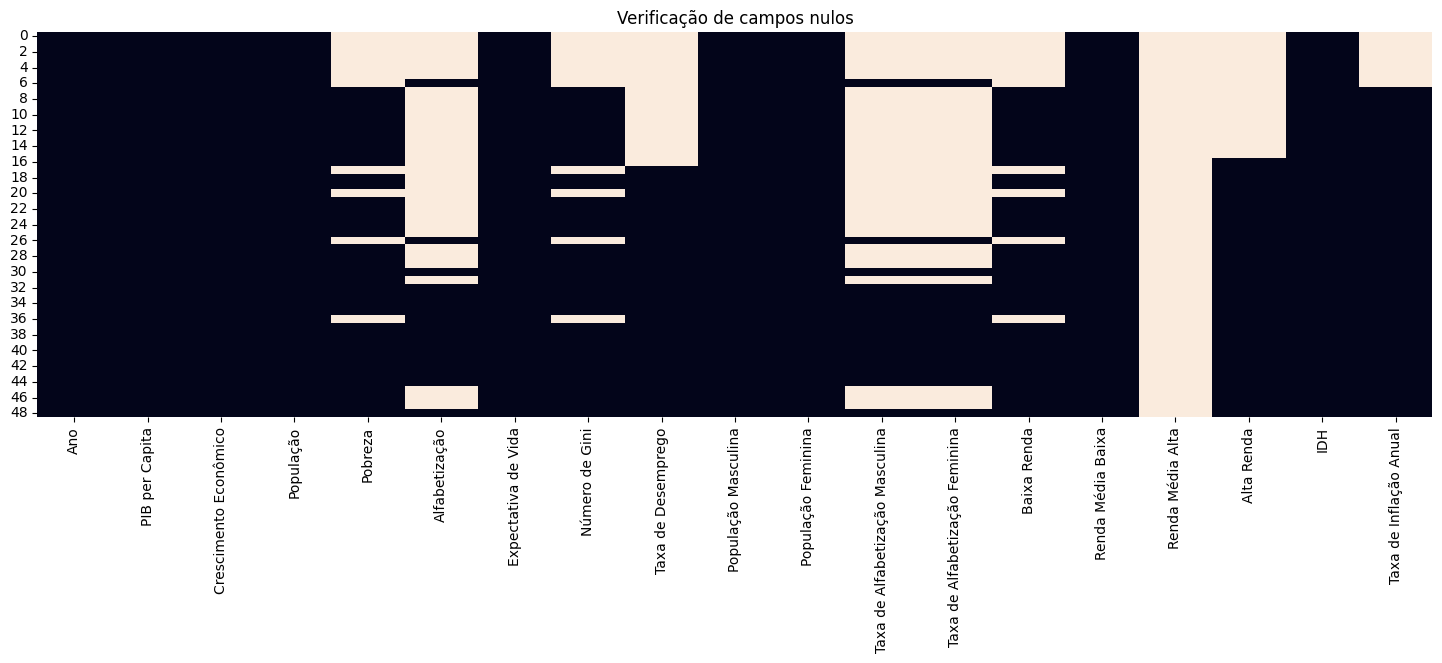

In [8]:
#Verificando campos nulos
plt.figure(figsize=(18,5))
plt.title('Verificação de campos nulos')
sns.heatmap(baseData.isnull(),cbar=False);

In [9]:
#Criando um segundo DataFrame
baseData2 = baseData[['Ano','PIB per Capita','Crescimento Econômico','População','Expectativa de Vida', 'População Masculina','População Feminina','Baixa Renda', 'Renda Média Baixa', 'Renda Média Alta','Alta Renda','IDH','Taxa de Inflação Anual']]
baseData2.head()

,Ano,PIB per Capita,Crescimento Econômico,População,Expectativa de Vida,População Masculina,População Feminina,Baixa Renda,Renda Média Baixa,Renda Média Alta,Alta Renda,IDH,Taxa de Inflação Anual
0,1974,1044.769809,8.153939,105089675,58.881,52448501,52641174,NaN,1044.769809,None,NaN,58.881,NaN
1,1975,1200.558237,5.166649,107619565,59.353,53701639,53917926,NaN,1200.558237,None,NaN,59.353,NaN
2,1976,1389.749523,10.257130,110213349,59.792,54988043,55225306,NaN,1389.749523,None,NaN,59.792,NaN
3,1977,1562.291430,4.934328,112875292,60.240,56309647,56565645,NaN,1562.291430,None,NaN,60.240,NaN
4,1978,1732.500122,4.969898,115600942,60.720,57663892,57937050,NaN,1732.500122,None,NaN,60.720,NaN


In [10]:
#Retirando campos nulos
baseData.dropna(inplace=True)

In [11]:
#Verificando campos nulos novamente
baseData.isnull().sum()

,0
Ano,0
PIB per Capita,0
Crescimento Econômico,0
População,0
Pobreza,0
Alfabetização,0
Expectativa de Vida,0
Número de Gini,0
Taxa de Desemprego,0
População Masculina,0


In [12]:
baseData.head()

,Ano,PIB per Capita,Crescimento Econômico,População,Pobreza,Alfabetização,Expectativa de Vida,Número de Gini,Taxa de Desemprego,População Masculina,População Feminina,Taxa de Alfabetização Masculina,Taxa de Alfabetização Feminina,Baixa Renda,Renda Média Baixa,Renda Média Alta,Alta Renda,IDH,Taxa de Inflação Anual


In [13]:
#Estatisticas

baseData.describe()

,PIB per Capita,Crescimento Econômico,População,Pobreza,Alfabetização,Expectativa de Vida,Número de Gini,Taxa de Desemprego,População Masculina,População Feminina,Taxa de Alfabetização Masculina,Taxa de Alfabetização Feminina,Baixa Renda,Renda Média Baixa,Alta Renda,IDH,Taxa de Inflação Anual
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


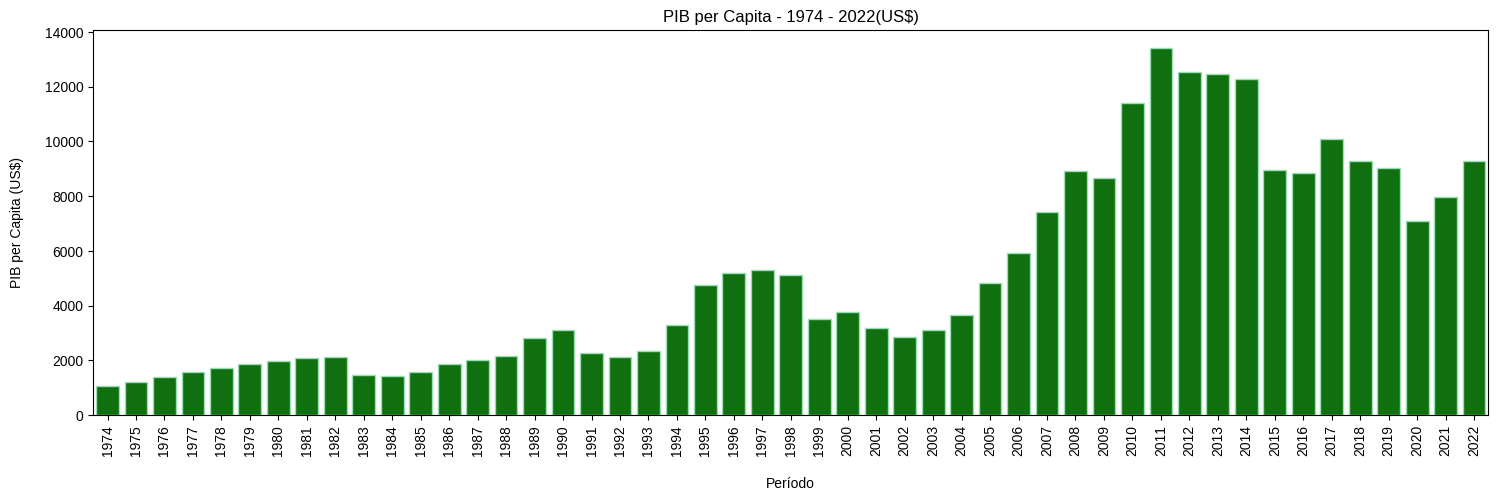

In [14]:
#Evolução do PIB per Capita: 1974 - 2022

#Tamanho da imagem
plt.figure(figsize=(18,5))

#Titulo
plt.title('PIB per Capita - 1974 - 2022(US$)')

#Estilo
plt.style.use('seaborn-v0_8-darkgrid')

#Gráfico de barras
sns.barplot(data=baseData2, x = 'Ano', y = 'PIB per Capita',color='green', edgecolor='#9adfb4')

#Labels
plt.xlabel('Período', labelpad=15)
plt.ylabel('PIB per Capita (US$)',labelpad=15)
plt.xticks(rotation=90);

In [15]:
#Evolução do PIB per Capita: 1974 - 2022 (Gráfico de Linhas)

#Criando uma figura
figure = Dash.Figure()

figure.add_trace(
    Dash.Scatter(
        x = baseData2['Ano'],
        y=baseData2['PIB per Capita'],
        mode = 'lines',
        marker_color = '#379217'

    )
)

#Ajustes no layout
figure.update_layout(
    #Titulo
    title = 'PIB per Capita - 1974 - 2022(US$)',

    #Tamanho
    titlefont_size=20,

    #xlabel
    xaxis = dict(
        title = 'Período',
        titlefont_size=14,
        tickmode = 'linear', #Define espaçamento linear
        dtick = 2, #Espaçamento de 2 anos

    ),

    #ylabel
    yaxis = dict(
        title = 'Pib per Capita em US$',
        titlefont_size=14,
        tickformat = ',d'

    )



)

In [16]:
baseData2.head()

,Ano,PIB per Capita,Crescimento Econômico,População,Expectativa de Vida,População Masculina,População Feminina,Baixa Renda,Renda Média Baixa,Renda Média Alta,Alta Renda,IDH,Taxa de Inflação Anual
0,1974,1044.769809,8.153939,105089675,58.881,52448501,52641174,NaN,1044.769809,None,NaN,58.881,NaN
1,1975,1200.558237,5.166649,107619565,59.353,53701639,53917926,NaN,1200.558237,None,NaN,59.353,NaN
2,1976,1389.749523,10.257130,110213349,59.792,54988043,55225306,NaN,1389.749523,None,NaN,59.792,NaN
3,1977,1562.291430,4.934328,112875292,60.240,56309647,56565645,NaN,1562.291430,None,NaN,60.240,NaN
4,1978,1732.500122,4.969898,115600942,60.720,57663892,57937050,NaN,1732.500122,None,NaN,60.720,NaN


In [17]:
#Evolução do Crescimento Econômico: 1974 - 2022

#Criando uma Figura
figure = Dash.Figure()

figure.add_trace(
    Dash.Scatter(
        x = baseData2['Ano'],
        y = baseData2['Crescimento Econômico'],
        mode = 'lines',
        marker_color = '#f05a0f'

    )
)

#Ajustes no layout
figure.update_layout(
    #Titulo
    title = 'Crescimento Econômico: 1974-2022',
    titlefont_size=20,

    #Ajustando eixo x
    xaxis = dict(
        title = 'Período',
        titlefont_size=14,
        dtick =2
    ),
    #Ajustando eixo y
    yaxis = dict(
        title = 'Crescimento Econômico (%)',
        titlefont_size=14

    )
)


In [18]:
#Crescimento Populacional: 1974 - 2022

#Criando uma Figura
figure = Dash.Figure()

figure.add_trace(
    Dash.Scatter(
        x = baseData2['Ano'],
        y = baseData2['População'],
        mode = 'lines',
        marker_color = '#1303fc'

    )
)

#Ajustes no layout
figure.update_layout(
    #Titulo
    title = 'Crescimento Populacional: 1974-2022',
    titlefont_size=20,

    #Ajustando eixo x
    xaxis = dict(
        title = 'Período',
        titlefont_size=14,
        dtick =2
    ),
    #Ajustando eixo y
    yaxis = dict(
        title = 'Crescimento Populacional',
        titlefont_size=14

    )
)

In [63]:
baseData2.head()

,Ano,PIB per Capita,Crescimento Econômico,População,Expectativa de Vida,População Masculina,População Feminina,Baixa Renda,Renda Média Baixa,Renda Média Alta,Alta Renda,IDH,Taxa de Inflação Anual
0,1974,1044.769809,8.153939,105089675,58.881,52448501,52641174,NaN,1044.769809,None,NaN,58.881,NaN
1,1975,1200.558237,5.166649,107619565,59.353,53701639,53917926,NaN,1200.558237,None,NaN,59.353,NaN
2,1976,1389.749523,10.257130,110213349,59.792,54988043,55225306,NaN,1389.749523,None,NaN,59.792,NaN
3,1977,1562.291430,4.934328,112875292,60.240,56309647,56565645,NaN,1562.291430,None,NaN,60.240,NaN
4,1978,1732.500122,4.969898,115600942,60.720,57663892,57937050,NaN,1732.500122,None,NaN,60.720,NaN


In [80]:
#Evolução do Crescimento Econômico, Expectativa de Vida e IDH: 1974 - 2022

#Crescimento Economico
figure = Dash.Figure()

figure.add_trace(
    Dash.Scatter(
        x = baseData2['Ano'],
        y = baseData2['Crescimento Econômico'],
        name= 'Crescimento Econômico (%)',
        mode = 'lines',
        marker_color = '#f05a0f',
        yaxis='y1'

    )
)


#IDH
figure.add_trace(
    Dash.Scatter(
        x = baseData2['Ano'],
        y = baseData2['IDH'],
        name = 'IDH',
        mode = 'lines',
        marker_color = '#1f4bc1',
        yaxis='y2'

    )
)

#Ajustes no layout
figure.update_layout(
    #Titulo
    title = 'Crescimento Econômico e IDH: 1974-2022',
    titlefont_size=20,

    #Ajustando eixo x
    xaxis = dict(
        title = 'Período',
        titlefont_size=14,
        dtick =2
    ),
    #Ajustando eixo y1
    yaxis = dict(
        title = 'Crescimento Econômico (%)',
        titlefont_size=14,
        showgrid=False

    ),

     #Ajustando eixo y2
    yaxis2 = dict(
        title = 'IDH',
        titlefont_size=14,
        overlaying='y',
        side='right',
        showgrid=False

    ),

    #Legenda
    legend=dict(
        x=1.05,
        y=1,
        bgcolor='rgba(255,255,255,0.6)',
        bordercolor='black'
    )
)



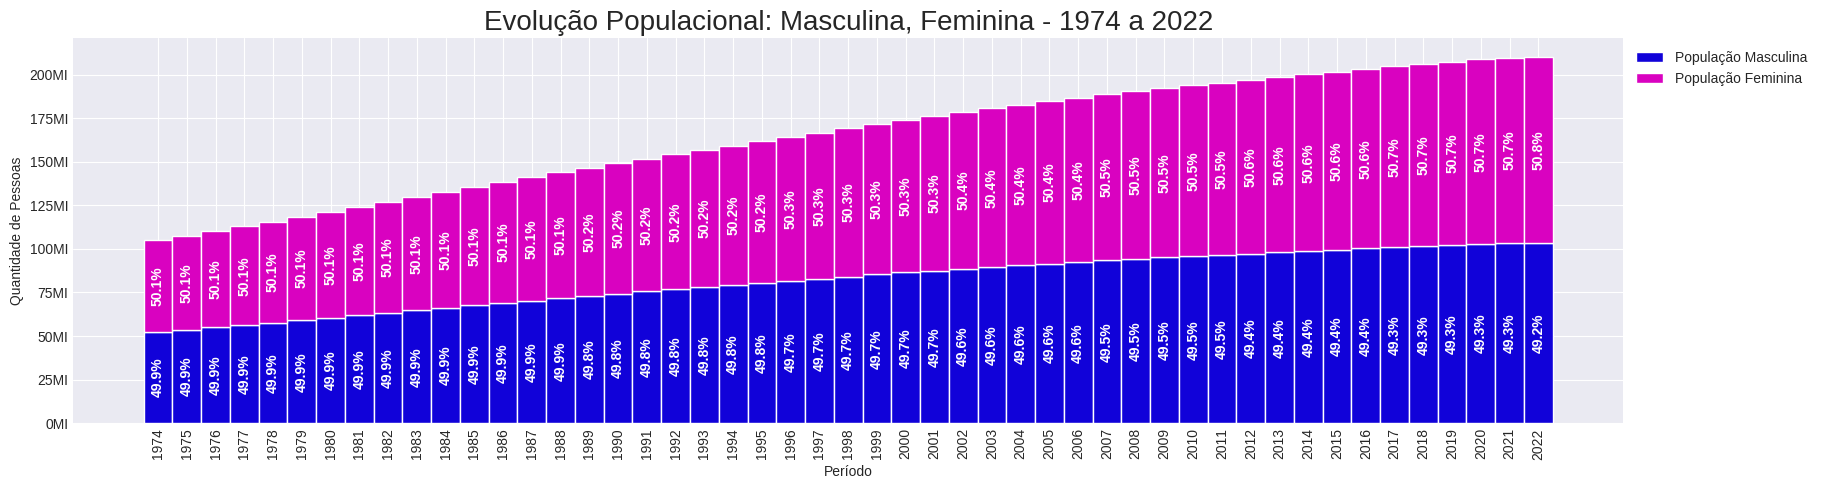

In [20]:
import matplotlib.ticker as mtick

#Gráfico de evolução Pop. Masculina x Feminina

#Tamanho
plt.figure(figsize=(20,5))

#Plot pop masc
plt.bar( baseData2['Ano'],baseData2['População Masculina'],color='#1102d9',edgecolor='white', width=1)

#Plot pop fem
plt.bar(baseData2['Ano'],baseData2['População Feminina'],bottom = baseData2['População Masculina'], color='#d902c0',edgecolor='white',width=1)

#Titulo
plt.title('Evolução Populacional: Masculina, Feminina - 1974 a 2022', loc='center',fontsize=20)

#Labels
plt.xlabel('Período')
plt.xticks(rotation=90)
plt.ylabel('Quantidade de Pessoas')

#Formatar valores do label Y para milhões
def milhoes(x,pos):
  return f'{x/1e6:.0f}MI'

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(milhoes))

#Calculo da porcentagem
totalPop = baseData2['População Masculina'] + baseData2['População Feminina']
pctMasc = (baseData2['População Masculina'] / totalPop) * 100
pctFem = (baseData2['População Feminina'] / totalPop) * 100

#Adicionar porcentagem dentro das barras
for i, ano in enumerate(baseData2['Ano']):
  plt.text(ano,baseData2['População Masculina'][i]/2, f'{pctMasc[i]:.1f}%', ha='center',va='center',color='white', fontsize = 10, weight='bold',rotation=90)
  plt.text(ano,baseData2['População Masculina'][i] + baseData2['População Feminina'][i]/2, f'{pctFem[i]:.1f}%', ha='center',va='center',color='white', fontsize = 10,weight='bold',rotation=90)


#Legenda
plt.legend(['População Masculina','População Feminina'], bbox_to_anchor=(1,1))

In [21]:
#Paleta de cores para o gráfico de dispersão

paletaCores = sns.color_palette('husl',20)
paletaCores

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.9704241569984234, 0.4603475375001678, 0.3099359864545268),
 (0.8616090647292522, 0.536495730113334, 0.19548899031476086),
 (0.7632105624545802, 0.5838460616396939, 0.19465686802007026),
 (0.6804189127793346, 0.6151497514677574, 0.19405452111445337),
 (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 (0.46810256823426105, 0.6699492535792404, 0.1928958739904499),
 (0.19316929744982803, 0.7018418078239693, 0.24321388407365968),
 (0.20125317221201128, 0.6907920815379025, 0.47966761189275336),
 (0.20631516405196249, 0.6834948167725491, 0.5761817437653648),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.21461147568939787, 0.6708637556281021, 0.7042594890626992),
 (0.2197995660828324, 0.6625157876850336, 0.7732093159317209),
 (0.22829030785596155, 0.6480515334381642, 0.8744997507366618),
 (0.433280341176423, 0.6065273407962815, 0.9585467098271748),
 (0.6423044349219739, 0.5497680051256467, 0.9582651433656727),
 (0.8004936186423958, 0.47703363533737203, 0.9579547196007522),
 (0.9579148533500138, 0.358831186992106, 0.9474115985773391),
 (0.962272393509669, 0.3976451968965351, 0.8008274363432775),
 (0.9651791951613143, 0.4212549802305815, 0.6785112441648762)]

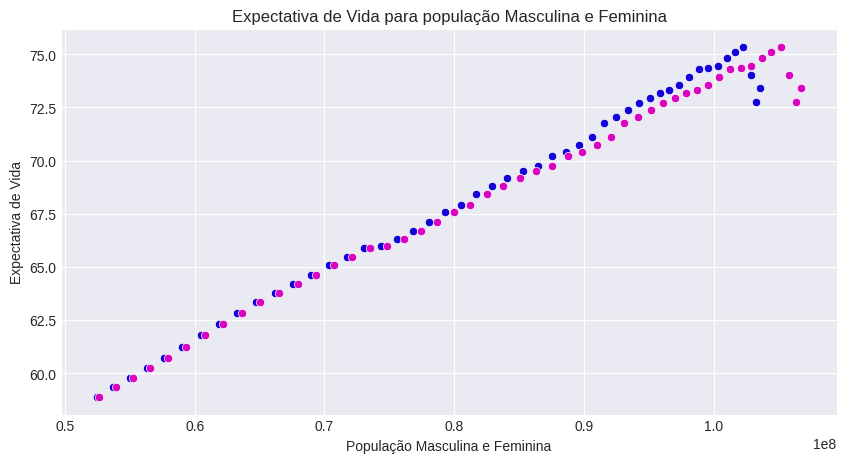

In [22]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=baseData2, x='População Masculina', y='Expectativa de Vida',color='#1102d9', )
sns.scatterplot(data=baseData2, x='População Feminina', y='Expectativa de Vida',color='#d902c0')

#Adicionando Titulo
plt.title('Expectativa de Vida para população Masculina e Feminina')
plt.xlabel('População Masculina e Feminina')

plt.show()

<Axes: >

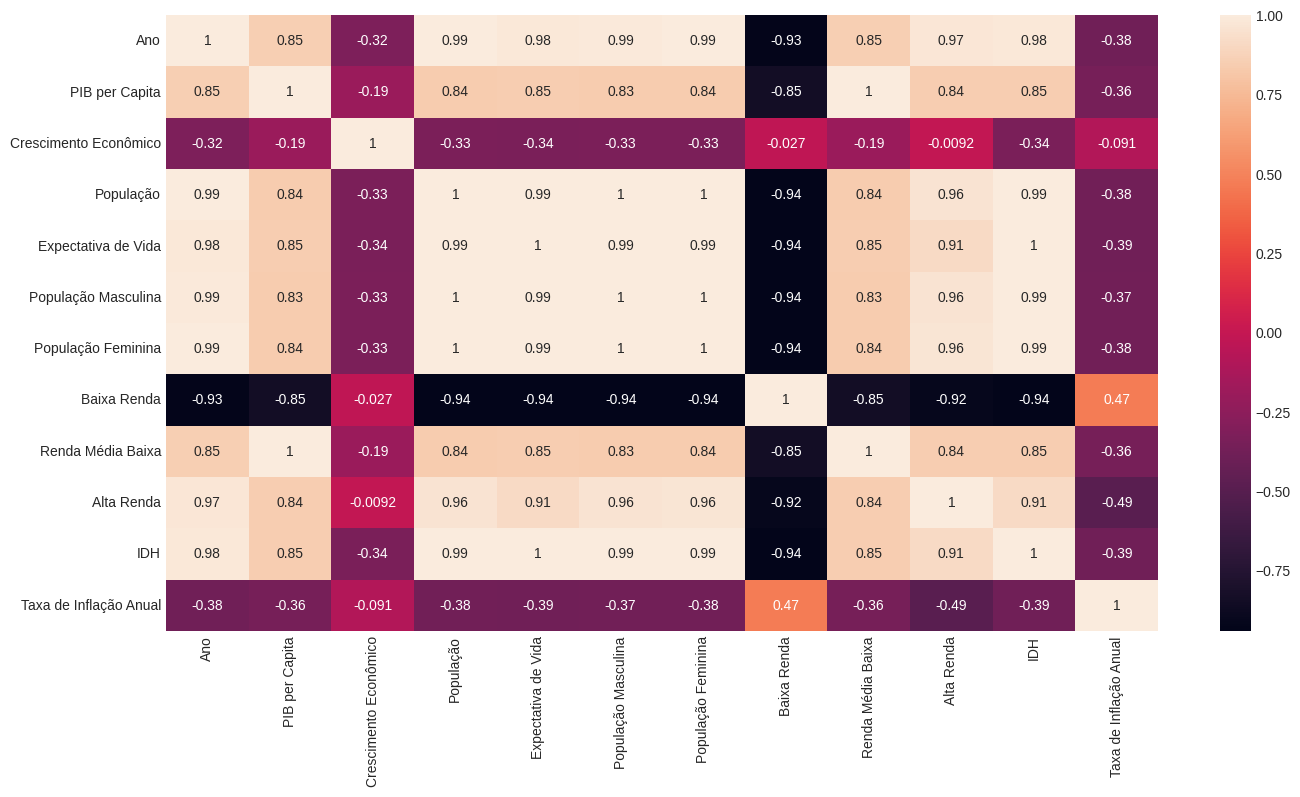

In [85]:
#Análise de correlações de toda a baseData2

plt.figure(figsize=(16,8))
sns.heatmap(baseData2.corr(numeric_only=True), annot=True)


<Axes: >

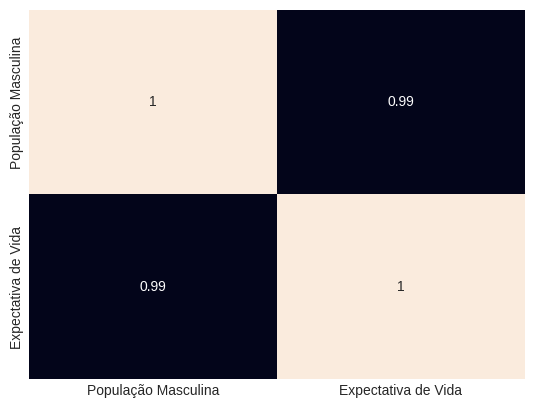

In [23]:
corrData = baseData2[['População Masculina','Expectativa de Vida']].corr()

sns.heatmap(corrData,cbar=False,annot=True)

<Axes: >

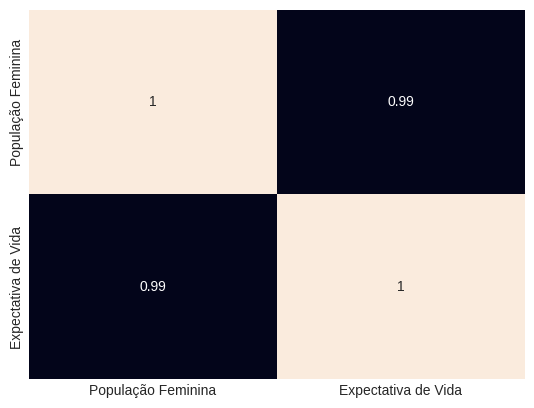

In [24]:
corrData = baseData2[['População Feminina','Expectativa de Vida']].corr()

sns.heatmap(corrData,cbar=False,annot=True)

<Axes: >

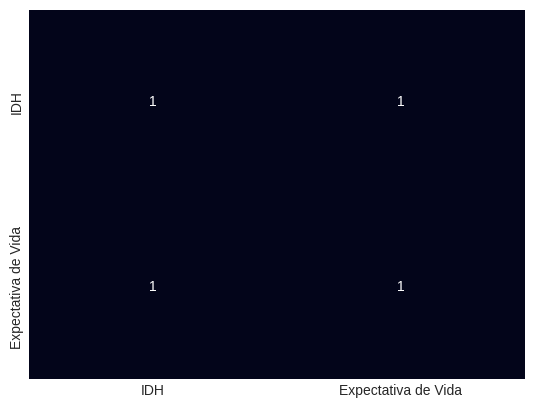

In [25]:
corrData = baseData2[['IDH','Expectativa de Vida']].corr()

sns.heatmap(corrData,cbar=False,annot=True)

<Axes: xlabel='Expectativa de Vida', ylabel='IDH'>

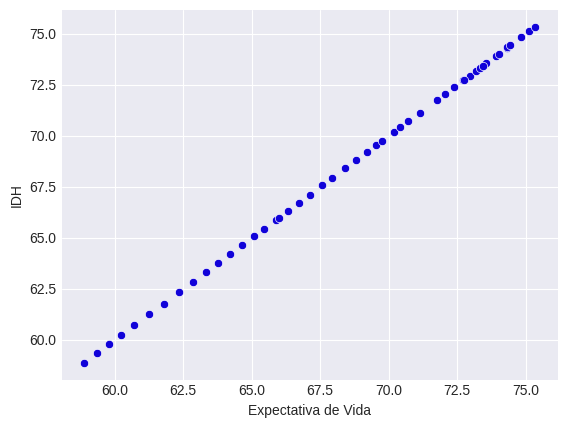

In [26]:
sns.scatterplot(data=baseData2, x='Expectativa de Vida', y='IDH',color='#1102d9', )

Observe que esse gráfico tem relação praticamente linear, portanto obedece a correlação de Parson. Tem-se uma correlação positiva perfeita

<Axes: >

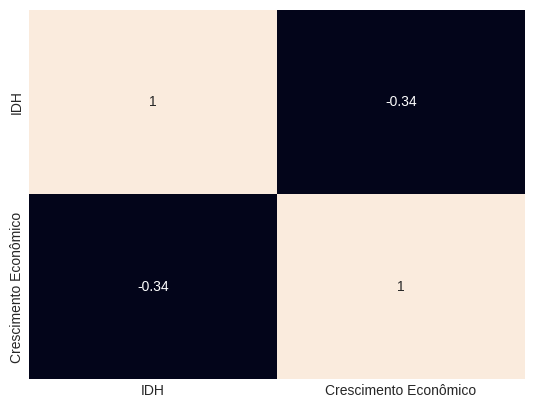

In [27]:
corrData = baseData2[['IDH','Crescimento Econômico']].corr()

sns.heatmap(corrData,cbar=False,annot=True)

<Axes: xlabel='IDH', ylabel='Crescimento Econômico'>

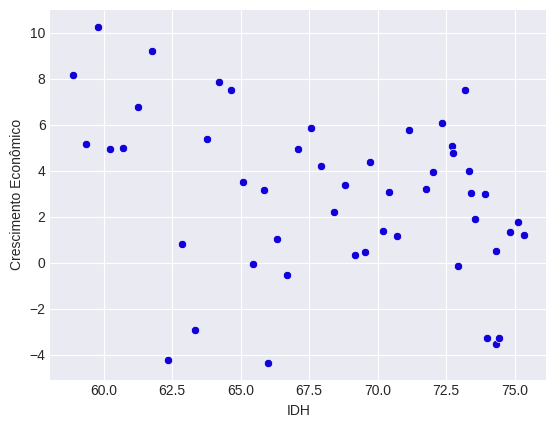

In [28]:
sns.scatterplot(data=baseData2, x='IDH', y='Crescimento Econômico',color='#1102d9', )


<Axes: >

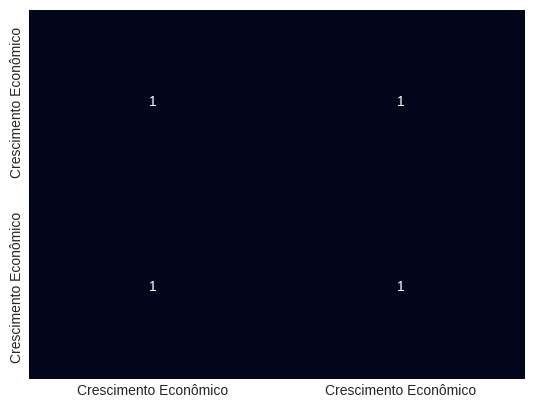

In [64]:
corrData = baseData2[['Crescimento Econômico','Crescimento Econômico']].corr()

sns.heatmap(corrData,cbar=False,annot=True)

Conclusões de Análise das Correlações:

Utilizamos análise de correlações quando desejamos analisar o potencial que uma determinada variável tem sobre a outra.

- Correlação negativa: quando uma variável diminui e a outra aumenta. Se o valor é próximo de -1, há uma correlação negativa forte.
- Correlação positiva: quando uma variável aumenta e a outra também aumenta. Se um valor é próximo de +1, há uma correlação positiva forte.

OBS: quando o valor da correlação é 0. não há uma relação significativa entre ambas as variáveis

Na primeira imagem tem-se o plot de um gráfico de heatmap de todas as variáveis numéricas da base de dados, é um meio extremamente poderoso e prático para analisarmos as dependências que TODAS as variáveis da base de dados tem uma sobre a outra.

Alguns casos são:

- PIB per Capita e População: correlação postiva forte, o crescimento de um é diretamente associado ao crescimento do outro
- PIB per Capita e Expectativa de Vida: correlação postiva forte, o crescimento de um é diretamente associado ao crescimento do outro
- Crescimento Econômico e Expectativa de Vida: correlação negativa fraca, rescimento de um é pouco associado ao crescimento do outro
- Crescimento Econômico e IDH: correlação negativa fraca, rescimento de um é pouco associado ao crescimento do outro

In [29]:
baseData2.head()

,Ano,PIB per Capita,Crescimento Econômico,População,Expectativa de Vida,População Masculina,População Feminina,Baixa Renda,Renda Média Baixa,Renda Média Alta,Alta Renda,IDH,Taxa de Inflação Anual
0,1974,1044.769809,8.153939,105089675,58.881,52448501,52641174,NaN,1044.769809,None,NaN,58.881,NaN
1,1975,1200.558237,5.166649,107619565,59.353,53701639,53917926,NaN,1200.558237,None,NaN,59.353,NaN
2,1976,1389.749523,10.257130,110213349,59.792,54988043,55225306,NaN,1389.749523,None,NaN,59.792,NaN
3,1977,1562.291430,4.934328,112875292,60.240,56309647,56565645,NaN,1562.291430,None,NaN,60.240,NaN
4,1978,1732.500122,4.969898,115600942,60.720,57663892,57937050,NaN,1732.500122,None,NaN,60.720,NaN


(0.0, 20.0)

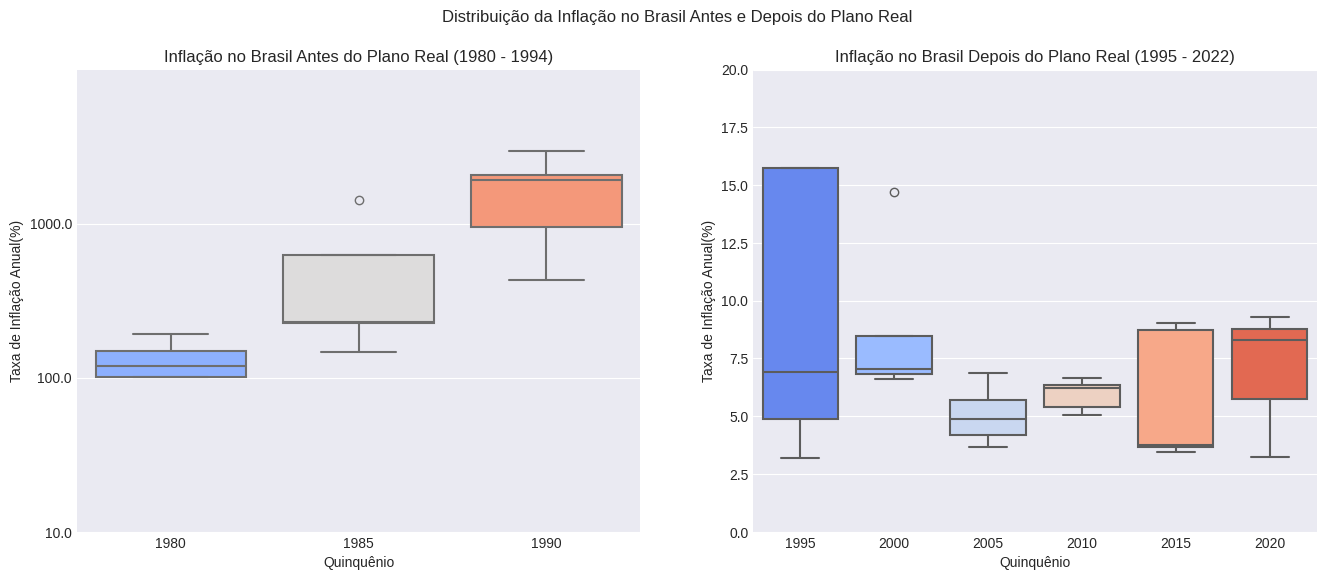

In [30]:
#Boxplot para análise da inflação 1980 - 2022

baseData2['Ano'] = baseData2['Ano'].astype(int)

baseFiltrada = baseData2[(baseData2['Ano'] >= 1980) & (baseData2['Ano'] <= 2022)]
#Agrupando por quinquênio
baseFiltrada['Quinquênio'] = (baseFiltrada['Ano']//5)*5

#Criando subplots
fig, axes = plt.subplots(1,2,figsize=(16,6))

#Titulo
plt.suptitle('Distribuição da Inflação no Brasil Antes e Depois do Plano Real')

#Antes do Plano Real
antesReal = baseFiltrada[baseFiltrada['Quinquênio'] < 1995]
#Gráfico de Boxplot
sns.boxplot(data=antesReal, x='Quinquênio',y='Taxa de Inflação Anual',ax=axes[0], palette='coolwarm',saturation=1,linewidth=1.5)
axes[0].set_title('Inflação no Brasil Antes do Plano Real (1980 - 1994)')
axes[0].set_xlabel('Quinquênio')
axes[0].set_ylabel('Taxa de Inflação Anual(%)')
axes[0].set_yscale('log')
axes[0].set_yticks([0.1,1,10,100,1000])
axes[0].get_yaxis().set_major_formatter(plt.ScalarFormatter())
axes[0].set_ylim(10,10000)


#Depois do Plano Real
depoisReal = baseFiltrada[baseFiltrada['Quinquênio'] >= 1995]
#Gráfico de Boxplot
sns.boxplot(data=depoisReal, x='Quinquênio',y='Taxa de Inflação Anual',ax=axes[1], palette='coolwarm',saturation=1,linewidth=1.5)
axes[1].set_title('Inflação no Brasil Depois do Plano Real (1995 - 2022)')
axes[1].set_xlabel('Quinquênio')
axes[1].set_ylabel('Taxa de Inflação Anual(%)')
axes[1].set_ylim(0,20)



Conclusões a respeito do Boxplot:

Antes do Plano Real:

- Mediana: localizada em valores elevados(exceção do ano de 1980) indicando inflação típica era extremamente alta
- Primeiro Quartil(Q1) e Terceiro Quartil(Q3): verifica-se que a amplitude interquartilica(IQR) é bastante elevada nos anos de 1985 e 1990, a variação é considerada(mais de 100% até mais de 1000%), evidencia a volatilidade da inflação no período
-Outliers: No ano de 1985 verifica-se a presença de um ponto de outlier e evindencia a hiperinflação existente na época

É importante destacar que para montar o gráfico foi necessário utilizar escala logarítmica para que a extensa variação de amplitude pudesse ser capturada


---

Depois do Plano Real:

Em primeiro momento nota-se que os valores de inflação são significativamente mais baixos se comparados aos anos dos quinquênios anteriores.

O ano de 1995 é particular, no boxplot pós plano real o ano de 1995 apresenta a maior amplitude interquartilica. Embora a mediana tenha caído consideravelmente, ainda existia grande variabilidade da inflação logo nos primeiros anos após a implementação do plano real, cenário normal de transição economica e saída de um período de hiperinflação.

- Mediana: verifica-se valor baixo(abaixo de 10% na maioria dos períodos) evidenciando o controle inflacionário. Nos anos de 200, 2005 e 2015 pelo menos 50% dos dados apresentam valores próximos de Q1(assimetria positiva). Nos anos de 2010 e 2020 pelo menos 50% dos dados apresentam valores próximos de Q3(assimetria negativa).
- Primeiro Quartil(Q1) e Terceiro Quartil(Q3): verifica-se que a amplitude interquartilica(IQR) é bem menor em comparação  a IQR antes do plano real, agora tem-se uma inflação mais previsível.
- Outliers: No ano de 2000 verifica-se a presença de um ponto de outlier e evindencia, porém menos extremo em comparação antes do plano real

É importante destacar que para montar o gráfico pós plano real utilizou-se uma escala linear que foi suficiente para representar os dados

Text(0, 0.5, 'Densidade')

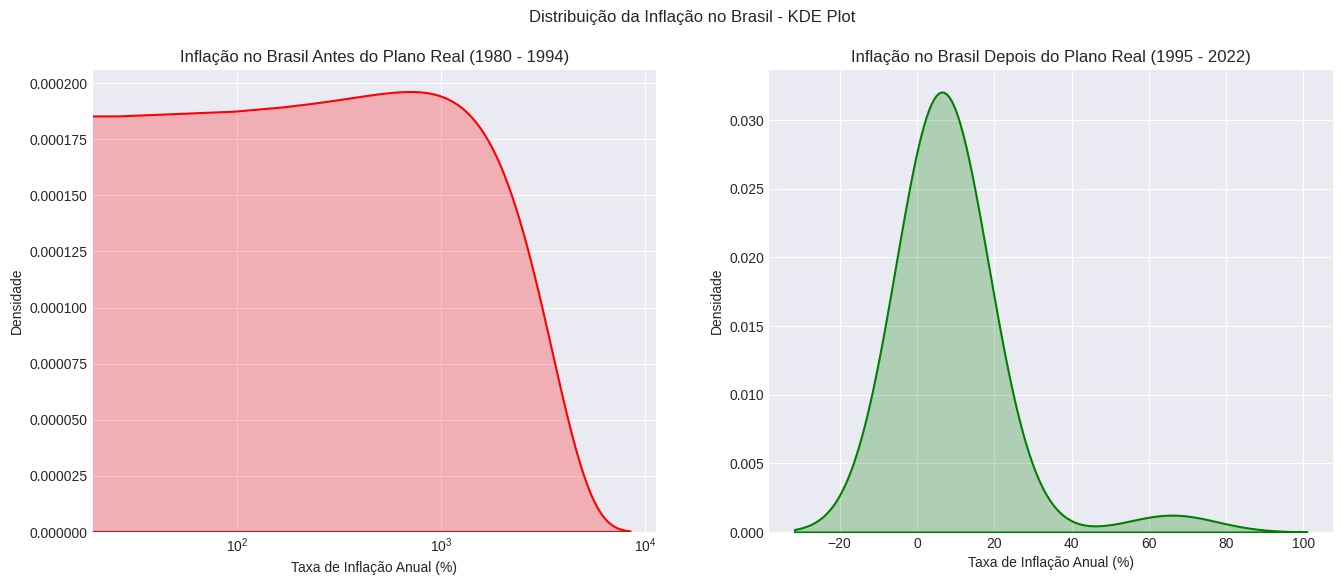

In [49]:
#Analisando Assimetrias

fig, axes = plt.subplots(1,2, figsize=(16,6) ) #Criar uma linha(1) e duas cokunas(2) de gráficos(subplots)

#Titulo
plt.suptitle('Distribuição da Inflação no Brasil - KDE Plot')

#KDE Plot Antes do Plano Peal
sns.kdeplot(antesReal['Taxa de Inflação Anual'], shade=True, bw=2, color='red',linewidth=1.5, ax= axes[0])
axes[0].set_title('Inflação no Brasil Antes do Plano Real (1980 - 1994)')
axes[0].set_xlabel('Taxa de Inflação Anual (%)')
axes[0].set_ylabel('Densidade')
axes[0].set_xscale('log')

#KDE Plot Depois do Plano Peal
sns.kdeplot(depoisReal['Taxa de Inflação Anual'], shade=True, bw=1, color='green',linewidth=1.5, ax= axes[1])
axes[1].set_title('Inflação no Brasil Depois do Plano Real (1995 - 2022)')
axes[1].set_xlabel('Taxa de Inflação Anual (%)')
axes[1].set_ylabel('Densidade')

In [62]:
#Cálculo da Assimetria

#Antes do Plano Real
antes = antesReal['Taxa de Inflação Anual'].skew()

#Depois do Plano Real
depois = depoisReal['Taxa de Inflação Anual'].skew()


print(antes, depois)



1.2745860913646416 4.74682058184646


Análise das Curvas de Assimetria

- Antes do Plano Real: observa-se que a curva apresenta uma cauda longa à direita ocorrendo presença de valores muitos elevados de alta inflação o que causava um cenário de hiperinflação extrema, tais valores inflacionários elevados "puxam" a distribuição para a direita

- Depois do Plano Real: observa-se que a curva apresenta uma cauda longa à esquerda, a maioria dos valores se concentram em níveis baixos de inflação e com alguns períodos de deflação(inflação negativa) o que ocasionam uma assimetria negativa. A densidade pós plano real é quase simétrica, maior parte da distribuição concentra-se próximo de 0% a 10% de inflação anual

In [87]:
#Medindo a curtose

#Antes do Plano Real
antes = antesReal['Taxa de Inflação Anual'].kurtosis()

#Depois do Plano Real
depois = depoisReal['Taxa de Inflação Anual'].kurtosis()

print(antes, depois)

0.6124761808616315 23.882943581853258


- Antes do Plano Real: K = 0.6125. Observa-se uma distribuição mesocúrtica que é semelhante à normal.
- Depois do Plano Real: K = 24. Observa-se uma distribuição leptocúrtica, portanto valores extremos mais frequentes, a distribuição fica mais sujeita a outliers

Faz sentido pois o Plano Real reduziu a inflação, mas houve alguns momentos de alta inflação esporádica


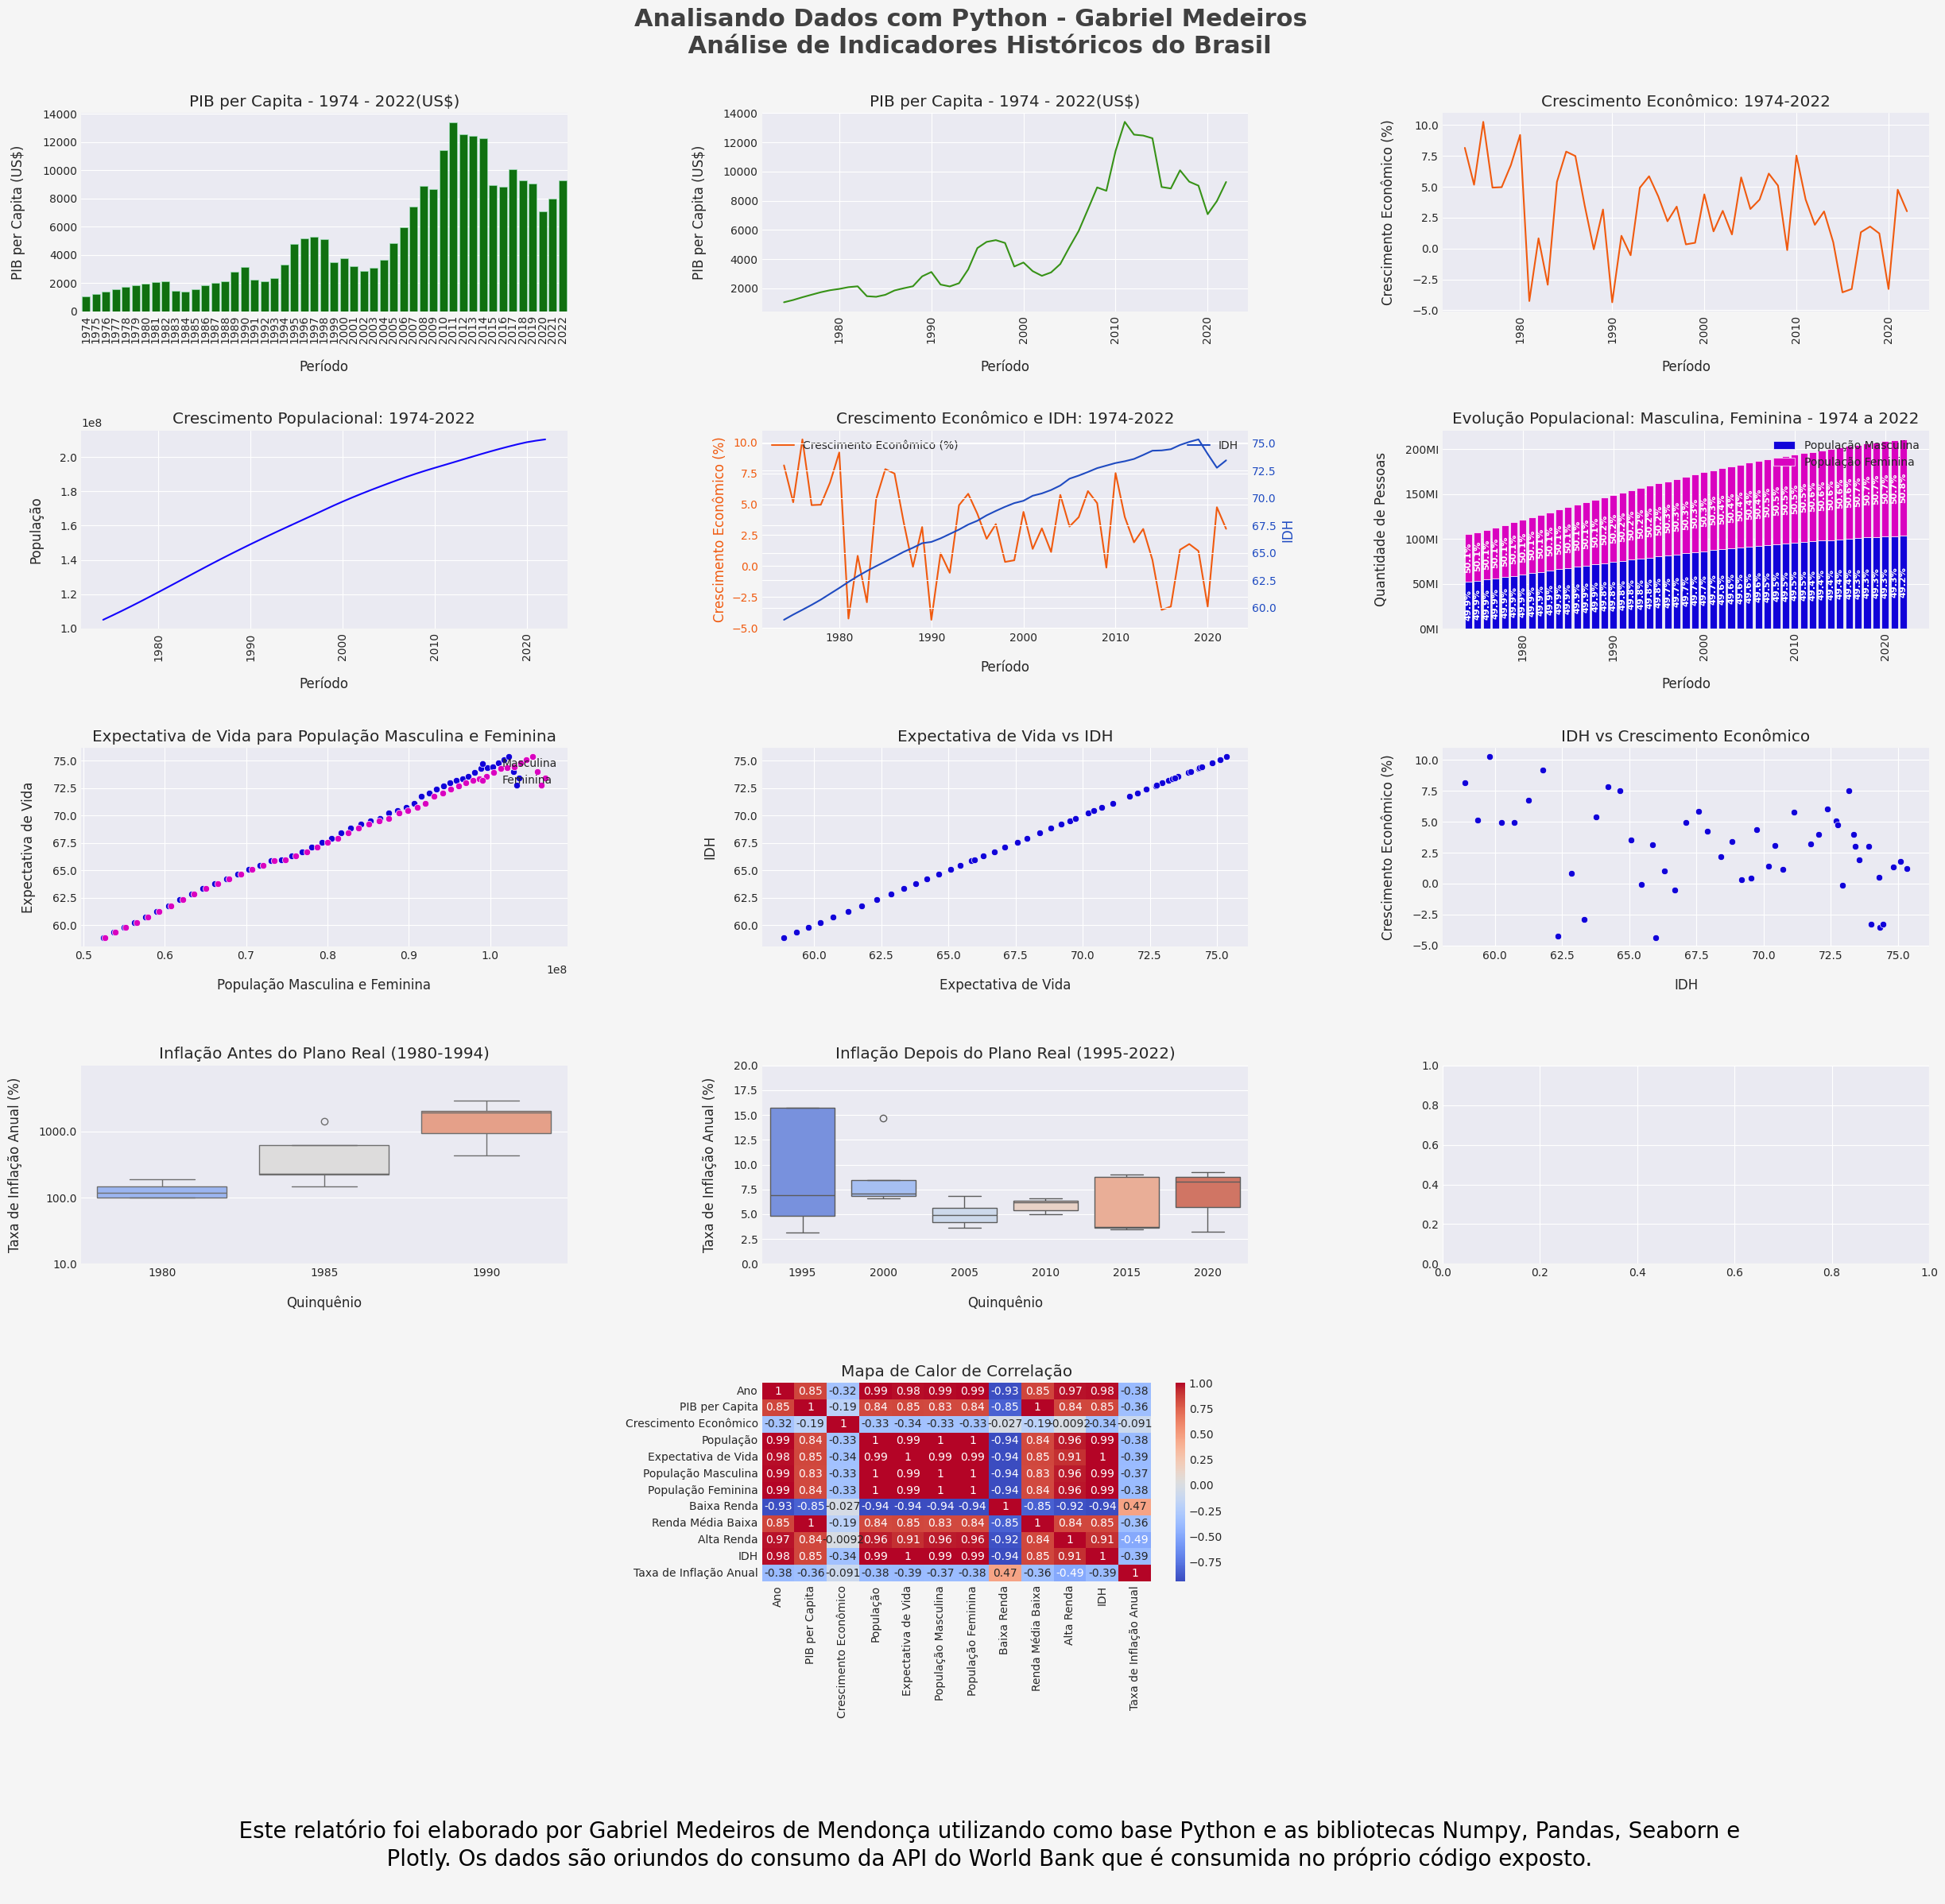

In [108]:
# Configurações gerais
sns.set_style('darkgrid')
corFundo = '#f5f5f5'

# Função para criar gráficos
def criarGraficos():
    # Criar uma grade de 5 linhas e 3 colunas, com a última linha reservada para o heatmap
    fig, axs = plt.subplots(5, 3, figsize=(30, 22))
    fig.set_facecolor(corFundo)
    fig.suptitle('Analisando Dados com Python - Gabriel Medeiros \n Análise de Indicadores Históricos do Brasil', fontsize=22, color='#404040', fontweight=600)

    # Ajustar o espaçamento geral
    plt.subplots_adjust(top=0.92, bottom=0.08, hspace=0.6, wspace=0.4)  # Ajustes de espaçamento

    # Gráfico 1: PIB per Capita - Barras
    sns.barplot(data=baseData2, x='Ano', y='PIB per Capita', color='green', edgecolor='#9adfb4', ax=axs[0, 0])
    axs[0, 0].set_title('PIB per Capita - 1974 - 2022(US$)')
    axs[0, 0].set_xlabel('Período', labelpad=15)
    axs[0, 0].set_ylabel('PIB per Capita (US$)', labelpad=15)
    axs[0, 0].tick_params(axis='x', rotation=90)

    # Gráfico 2: PIB per Capita - Linhas
    sns.lineplot(data=baseData2, x='Ano', y='PIB per Capita', color='#379217', ax=axs[0, 1])
    axs[0, 1].set_title('PIB per Capita - 1974 - 2022(US$)')
    axs[0, 1].set_xlabel('Período', labelpad=15)
    axs[0, 1].set_ylabel('PIB per Capita (US$)', labelpad=15)
    axs[0, 1].tick_params(axis='x', rotation=90)

    # Gráfico 3: Crescimento Econômico
    sns.lineplot(data=baseData2, x='Ano', y='Crescimento Econômico', color='#f05a0f', ax=axs[0, 2])
    axs[0, 2].set_title('Crescimento Econômico: 1974-2022')
    axs[0, 2].set_xlabel('Período', labelpad=15)
    axs[0, 2].set_ylabel('Crescimento Econômico (%)', labelpad=15)
    axs[0, 2].tick_params(axis='x', rotation=90)

    # Gráfico 4: Crescimento Populacional
    sns.lineplot(data=baseData2, x='Ano', y='População', color='#1303fc', ax=axs[1, 0])
    axs[1, 0].set_title('Crescimento Populacional: 1974-2022')
    axs[1, 0].set_xlabel('Período', labelpad=15)
    axs[1, 0].set_ylabel('População', labelpad=15)
    axs[1, 0].tick_params(axis='x', rotation=90)

    # Gráfico 5: Crescimento Econômico e IDH
    axs[1, 1].plot(baseData2['Ano'], baseData2['Crescimento Econômico'], color='#f05a0f', label='Crescimento Econômico (%)')
    axs[1, 1].set_ylabel('Crescimento Econômico (%)', color='#f05a0f')
    axs[1, 1].tick_params(axis='y', labelcolor='#f05a0f')
    ax2 = axs[1, 1].twinx()
    ax2.plot(baseData2['Ano'], baseData2['IDH'], color='#1f4bc1', label='IDH')
    ax2.set_ylabel('IDH', color='#1f4bc1')
    ax2.tick_params(axis='y', labelcolor='#1f4bc1')
    axs[1, 1].set_title('Crescimento Econômico e IDH: 1974-2022')
    axs[1, 1].set_xlabel('Período', labelpad=15)
    axs[1, 1].legend(loc='upper left')
    ax2.legend(loc='upper right')

    # Gráfico 6: Evolução Populacional (Masculina e Feminina)
    axs[1, 2].bar(baseData2['Ano'], baseData2['População Masculina'], color='#1102d9', edgecolor='white', label='População Masculina')
    axs[1, 2].bar(baseData2['Ano'], baseData2['População Feminina'], bottom=baseData2['População Masculina'], color='#d902c0', edgecolor='white', label='População Feminina')
    axs[1, 2].set_title('Evolução Populacional: Masculina, Feminina - 1974 a 2022')
    axs[1, 2].set_xlabel('Período', labelpad=15)
    axs[1, 2].set_ylabel('Quantidade de Pessoas', labelpad=15)
    axs[1, 2].tick_params(axis='x', rotation=90)
    axs[1, 2].legend(loc='upper right')

    # Formatar valores do eixo Y para milhões
    def milhoes(x, pos):
        return f'{x/1e6:.0f}MI'
    axs[1, 2].yaxis.set_major_formatter(mtick.FuncFormatter(milhoes))

    # Adicionar porcentagem dentro das barras
    totalPop = baseData2['População Masculina'] + baseData2['População Feminina']
    pctMasc = (baseData2['População Masculina'] / totalPop) * 100
    pctFem = (baseData2['População Feminina'] / totalPop) * 100
    for i, ano in enumerate(baseData2['Ano']):
        axs[1, 2].text(ano, baseData2['População Masculina'][i]/2, f'{pctMasc[i]:.1f}%', ha='center', va='center', color='white', fontsize=8, weight='bold', rotation=90)
        axs[1, 2].text(ano, baseData2['População Masculina'][i] + baseData2['População Feminina'][i]/2, f'{pctFem[i]:.1f}%', ha='center', va='center', color='white', fontsize=8, weight='bold', rotation=90)

    # Gráfico 7: Expectativa de Vida
    sns.scatterplot(data=baseData2, x='População Masculina', y='Expectativa de Vida', color='#1102d9', ax=axs[2, 0], label='Masculina')
    sns.scatterplot(data=baseData2, x='População Feminina', y='Expectativa de Vida', color='#d902c0', ax=axs[2, 0], label='Feminina')
    axs[2, 0].set_title('Expectativa de Vida para População Masculina e Feminina')
    axs[2, 0].set_xlabel('População Masculina e Feminina', labelpad=15)
    axs[2, 0].set_ylabel('Expectativa de Vida', labelpad=15)
    axs[2, 0].legend(loc='upper right')

    # Gráfico 8: Expectativa de Vida vs IDH
    sns.scatterplot(data=baseData2, x='Expectativa de Vida', y='IDH', color='#1102d9', ax=axs[2, 1])
    axs[2, 1].set_title('Expectativa de Vida vs IDH')
    axs[2, 1].set_xlabel('Expectativa de Vida', labelpad=15)
    axs[2, 1].set_ylabel('IDH', labelpad=15)

    # Gráfico 9: IDH vs Crescimento Econômico
    sns.scatterplot(data=baseData2, x='IDH', y='Crescimento Econômico', color='#1102d9', ax=axs[2, 2])
    axs[2, 2].set_title('IDH vs Crescimento Econômico')
    axs[2, 2].set_xlabel('IDH', labelpad=15)
    axs[2, 2].set_ylabel('Crescimento Econômico (%)', labelpad=15)

    # Gráfico 10: Inflação Antes e Depois do Plano Real
    baseData2['Ano'] = baseData2['Ano'].astype(int)
    baseFiltrada = baseData2[(baseData2['Ano'] >= 1980) & (baseData2['Ano'] <= 2022)]
    baseFiltrada['Quinquênio'] = (baseFiltrada['Ano'] // 5) * 5

    antesReal = baseFiltrada[baseFiltrada['Quinquênio'] < 1995]
    depoisReal = baseFiltrada[baseFiltrada['Quinquênio'] >= 1995]

    sns.boxplot(data=antesReal, x='Quinquênio', y='Taxa de Inflação Anual', palette='coolwarm', ax=axs[3, 0])
    axs[3, 0].set_title('Inflação Antes do Plano Real (1980-1994)')
    axs[3, 0].set_xlabel('Quinquênio', labelpad=15)
    axs[3, 0].set_ylabel('Taxa de Inflação Anual (%)', labelpad=15)
    axs[3, 0].set_yscale('log')
    axs[3, 0].set_yticks([0.1, 1, 10, 100, 1000])
    axs[3, 0].get_yaxis().set_major_formatter(plt.ScalarFormatter())
    axs[3, 0].set_ylim(10, 10000)

    sns.boxplot(data=depoisReal, x='Quinquênio', y='Taxa de Inflação Anual', palette='coolwarm', ax=axs[3, 1])
    axs[3, 1].set_title('Inflação Depois do Plano Real (1995-2022)')
    axs[3, 1].set_xlabel('Quinquênio', labelpad=15)
    axs[3, 1].set_ylabel('Taxa de Inflação Anual (%)', labelpad=15)
    axs[3, 1].set_ylim(0, 20)

    # Gráfico 11: Heatmap de Correlação (centralizado na última linha)
    sns.heatmap(baseData2.corr(numeric_only=True), annot=True, ax=axs[4, 1], cmap='coolwarm')
    axs[4, 1].set_title('Mapa de Calor de Correlação')

    # Remover subplots vazios
    for i in range(3):
        fig.delaxes(axs[4, i]) if i != 1 else None  # Remove subplots vazios na última linha, exceto o do heatmap

    # Rodapé
    rodape = '''
    Este relatório foi elaborado por Gabriel Medeiros de Mendonça utilizando como base Python e as bibliotecas Numpy, Pandas, Seaborn e
    Plotly. Os dados são oriundos do consumo da API do World Bank que é consumida no próprio código exposto.
    '''
    fig.text(0.5, -0.1, rodape, ha='center', va='bottom', size=20, color='black')

    plt.show()

# Chamar a função para criar os gráficos
criarGraficos()